In [1]:
import os
import math
import random
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from res import plot_data, plot_model, set_default

In [2]:
set_default()

In [3]:
SEED = 1

In [4]:
def seed_everything(seed: int = 1) -> None:
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

In [5]:
seed_everything(SEED)

In [6]:
N = 1000  # num_samples_per_class
D = 1  # dimensions
C = 1  # num_classes
H = 100 

In [7]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(3) + 0.3 * torch.rand(X.size())

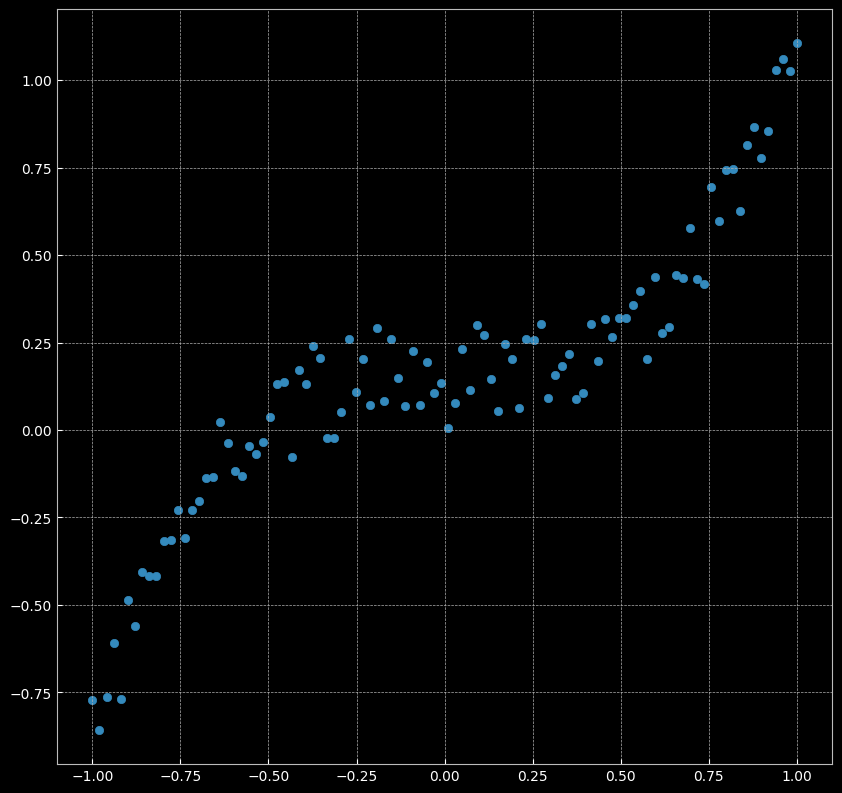

In [8]:
plt.scatter(X.numpy(), y.numpy())

In [9]:
print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


In [10]:
learning_rate = 1e-3
lambda_l2 = 1e-5


In [11]:
n_networks = 5
models = list()
y_pretrain = list()

criterion = nn.MSELoss()

for mod in range(n_networks):
    
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU(),
        nn.Linear(H, C)
    )


    models.append(model)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

    for t in range(1000):
        y_pred = model(X)

        if t==0:
            y_pretrain.append(y_pred.detach())

        loss = criterion(y_pred, y)

        print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")

        # display.clear_output(wait=True)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()




[MODEL]: 1, [EPOCH]: 0, [LOSS]: 0.320728
[MODEL]: 1, [EPOCH]: 1, [LOSS]: 0.296977
[MODEL]: 1, [EPOCH]: 2, [LOSS]: 0.275076
[MODEL]: 1, [EPOCH]: 3, [LOSS]: 0.254975
[MODEL]: 1, [EPOCH]: 4, [LOSS]: 0.236517
[MODEL]: 1, [EPOCH]: 5, [LOSS]: 0.219496
[MODEL]: 1, [EPOCH]: 6, [LOSS]: 0.203727
[MODEL]: 1, [EPOCH]: 7, [LOSS]: 0.189045
[MODEL]: 1, [EPOCH]: 8, [LOSS]: 0.175321
[MODEL]: 1, [EPOCH]: 9, [LOSS]: 0.162458
[MODEL]: 1, [EPOCH]: 10, [LOSS]: 0.150381
[MODEL]: 1, [EPOCH]: 11, [LOSS]: 0.139037
[MODEL]: 1, [EPOCH]: 12, [LOSS]: 0.128387
[MODEL]: 1, [EPOCH]: 13, [LOSS]: 0.118399
[MODEL]: 1, [EPOCH]: 14, [LOSS]: 0.109049
[MODEL]: 1, [EPOCH]: 15, [LOSS]: 0.100317
[MODEL]: 1, [EPOCH]: 16, [LOSS]: 0.092184
[MODEL]: 1, [EPOCH]: 17, [LOSS]: 0.084636
[MODEL]: 1, [EPOCH]: 18, [LOSS]: 0.077656
[MODEL]: 1, [EPOCH]: 19, [LOSS]: 0.071229
[MODEL]: 1, [EPOCH]: 20, [LOSS]: 0.065342
[MODEL]: 1, [EPOCH]: 21, [LOSS]: 0.059980
[MODEL]: 1, [EPOCH]: 22, [LOSS]: 0.055129
[MODEL]: 1, [EPOCH]: 23, [LOSS]: 0.050774
[M

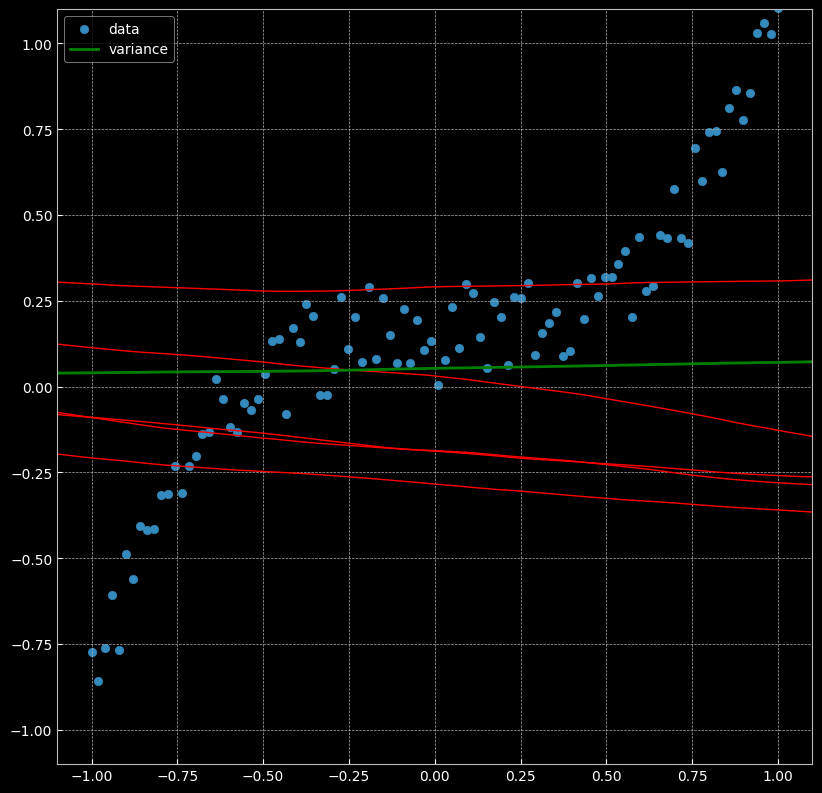

In [12]:
for y_pretrain_idx in y_pretrain:
    # New X that ranges from -5 to 5 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
        
    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1))
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance')
plt.legend();

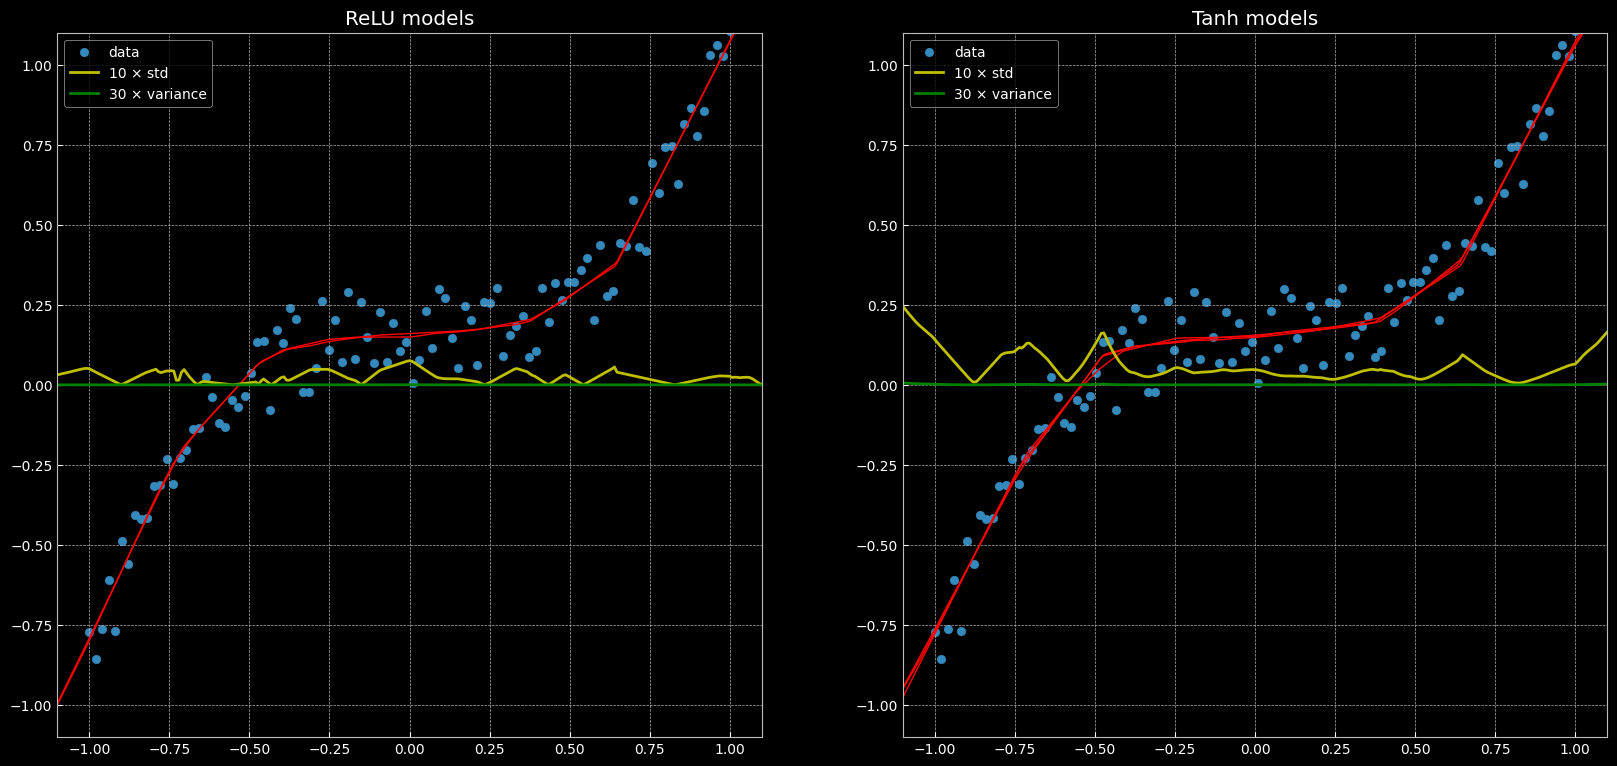

In [13]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20, 10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        # New X that ranges from -5 to 5 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim=1)

        # Getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().sqrt().numpy(), 'y', label='10 × std')
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().numpy(), 'g', label='30 × variance')
    plt.legend()
    plt.title(non_linearity + ' models')

z = 1  # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)